In [88]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.io import loadmat


In [89]:
mnist = loadmat("./dataset/mnist-original.mat")
mnist_data = mnist["data"].T
mnist_label = mnist["label"][0]
mnist_data.shape,mnist_label.shape


((70000, 784), (70000,))

In [90]:
X=mnist_data/255
y=mnist_label
y=y.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
 

((56000, 784), (14000, 784), (56000,), (14000,))

In [91]:
input_size = 784  
output_size = 10 

In [92]:
def show(input,target,ind):
    image = input[ind].reshape(28, 28) 
    print(target[ind])
    plt.imshow(image, cmap='gray')
    plt.show()


In [93]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [94]:
def initialize_parameters(layer_sizes):
    parameters = {}
    np.random.seed(32)
    for l in range(1, len(layer_sizes)):
        parameters['W' + str(l)] = np.random.randn(layer_sizes[l], layer_sizes[l-1])
        parameters['b' + str(l)] = np.zeros((layer_sizes[l], 1))
    return parameters

In [95]:
def forward(X, parameters):
    activations = [X]
    A = X
    L = len(parameters) // 2
    for l in range(1, L + 1):
        Z = np.dot(parameters['W' + str(l)], A) + parameters['b' + str(l)]
        A = sigmoid(Z)
        activations.append(A)
    return activations


In [96]:
def backprop(X, y, activations, parameters):
    m = X.shape[1]
    y_onehot = np.zeros((y.size, output_size))
    y_onehot[np.arange(y.size), y] = 1
    
    L = len(parameters) // 2
    grads = {}
    A_prev = activations[-2]
    dZ = activations[-1] - y_onehot.T
    grads['dW' + str(L)] = np.dot(dZ, A_prev.T) / m
    grads['db' + str(L)] = np.sum(dZ, axis=1, keepdims=True) / m
    
    for l in range(L-1, 0, -1):
        dA = np.dot(parameters['W' + str(l+1)].T, dZ)
        dZ = dA * sigmoid_derivative(activations[l])
        A_prev = activations[l-1]
        grads['dW' + str(l)] = np.dot(dZ, A_prev.T) / m
        grads['db' + str(l)] = np.sum(dZ, axis=1, keepdims=True) / m
    
    return grads

In [97]:
def update_parameters(parameters, grads, lr):
    L = len(parameters) // 2
    for l in range(1, L + 1):
        parameters['W' + str(l)] -= lr * grads['dW' + str(l)]
        parameters['b' + str(l)] -= lr * grads['db' + str(l)]
    return parameters

In [98]:
def train(X_train, y_train, layer_sizes, epochs=100, batch_size=32, learning_rate=0.01):
    cost=[]
    parameters = initialize_parameters(layer_sizes)
    m = X_train.shape[0]
    for epoch in tqdm(range(epochs)):
        indices = np.random.permutation(m)
        X_train_shuffled = X_train[indices]
        y_train_shuffled = y_train[indices]
        
        for i in range(0, m, batch_size):
            X_batch = X_train_shuffled[i:i+batch_size].T
            y_batch = y_train_shuffled[i:i+batch_size]
            
            activations = forward(X_batch, parameters)
            grads = backprop(X_batch, y_batch, activations, parameters)
            parameters = update_parameters(parameters, grads, learning_rate)
        
        if epoch % 10 == 0:
            loss = np.mean(np.square(activations[-1] - (np.eye(output_size)[y_batch]).T))
            cost.append((epoch, loss))
            print(f"Epoch {epoch}, Loss: {loss}, Accuracy: {1-loss}")
            
    return parameters,cost

In [99]:
def predict(X, parameters):
    activations = forward(X, parameters)
    return np.argmax(activations[-1], axis=0)

In [105]:

def infer(input,target,ind,parameters):
    show(input,target,ind)
    digit = predict(input[ind:].T,parameters)
    print(f"The Actual image is digit {target[ind]}")
    print(f"The Predicted image is digit {digit[0]}")



In [100]:
layer_sizes = [input_size, 16,32,64,64,32,16,output_size]
parameters,cost = train(X_train, y_train, layer_sizes, epochs=100, batch_size=64, learning_rate=0.01)

  1%|          | 1/100 [00:00<01:27,  1.13it/s]

Epoch 0, Loss: 0.08836199736124399, Accuracy: 0.911638002638756


 11%|█         | 11/100 [00:09<01:09,  1.28it/s]

Epoch 10, Loss: 0.07000380908354853, Accuracy: 0.9299961909164515


 21%|██        | 21/100 [00:16<01:00,  1.31it/s]

Epoch 20, Loss: 0.05579452496980888, Accuracy: 0.9442054750301911


 31%|███       | 31/100 [00:24<00:53,  1.28it/s]

Epoch 30, Loss: 0.040493996687828826, Accuracy: 0.9595060033121712


 41%|████      | 41/100 [00:32<00:45,  1.30it/s]

Epoch 40, Loss: 0.0357183112843348, Accuracy: 0.9642816887156652


 51%|█████     | 51/100 [00:39<00:37,  1.32it/s]

Epoch 50, Loss: 0.017806564997097332, Accuracy: 0.9821934350029027


 61%|██████    | 61/100 [00:48<00:31,  1.22it/s]

Epoch 60, Loss: 0.021352638882270892, Accuracy: 0.9786473611177291


 71%|███████   | 71/100 [00:56<00:22,  1.29it/s]

Epoch 70, Loss: 0.019340652828265394, Accuracy: 0.9806593471717346


 81%|████████  | 81/100 [01:04<00:14,  1.30it/s]

Epoch 80, Loss: 0.014320164972408159, Accuracy: 0.9856798350275918


 91%|█████████ | 91/100 [01:11<00:06,  1.29it/s]

Epoch 90, Loss: 0.019141010515645984, Accuracy: 0.980858989484354


100%|██████████| 100/100 [01:18<00:00,  1.27it/s]


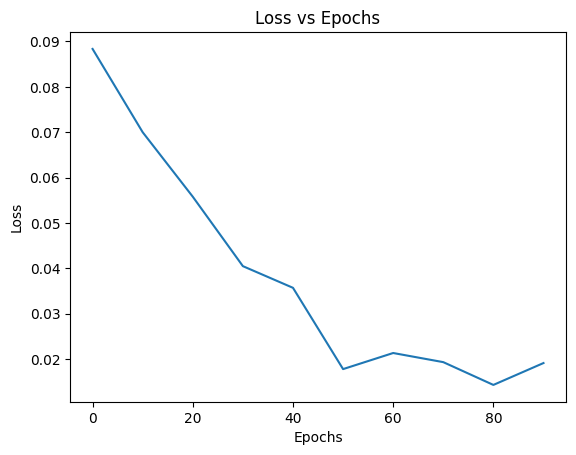

In [101]:
plt.plot(*zip(*cost))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs') 
plt.show()


In [115]:
from sklearn.metrics import accuracy_score

# Train accuracy
y_pred = predict(X_train.T,parameters)
accuracy = accuracy_score(y_train, y_pred)*100
print(f"Train Accuracy: {accuracy:.2f}%")


#Test accuracy
y_pred = predict(X_test.T,parameters)
accuracy = accuracy_score(y_test, y_pred)*100
print(f"Test Accuracy: {accuracy:.2f}%")

Train Accuracy: 88.53%
Test Accuracy: 87.49%


In [117]:
print(y_pred[:10])
print(y_train[:10])

mismatches = np.where(y_pred != y_test)[0]
print(f"Number of mismatches: {len(mismatches)}")
for idx in mismatches:
    print(f"Index {idx}: Predicted={y_pred[idx]}, Actual={y_train[idx]}")

[7 8 6 5 7 1 3 3 0 9]
[7 7 1 5 0 3 4 9 3 4]
Number of mismatches: 1751
Index 12: Predicted=4, Actual=0
Index 13: Predicted=4, Actual=8
Index 21: Predicted=5, Actual=9
Index 25: Predicted=9, Actual=2
Index 29: Predicted=7, Actual=7
Index 42: Predicted=4, Actual=2
Index 54: Predicted=8, Actual=0
Index 55: Predicted=0, Actual=6
Index 61: Predicted=3, Actual=8
Index 68: Predicted=3, Actual=3
Index 70: Predicted=7, Actual=9
Index 75: Predicted=3, Actual=3
Index 79: Predicted=3, Actual=4
Index 85: Predicted=1, Actual=5
Index 87: Predicted=3, Actual=9
Index 92: Predicted=6, Actual=2
Index 96: Predicted=4, Actual=2
Index 102: Predicted=1, Actual=3
Index 121: Predicted=4, Actual=2
Index 125: Predicted=5, Actual=2
Index 129: Predicted=6, Actual=8
Index 136: Predicted=5, Actual=3
Index 140: Predicted=9, Actual=9
Index 147: Predicted=2, Actual=9
Index 156: Predicted=8, Actual=3
Index 161: Predicted=3, Actual=5
Index 163: Predicted=3, Actual=4
Index 172: Predicted=5, Actual=0
Index 177: Predicted=9

5


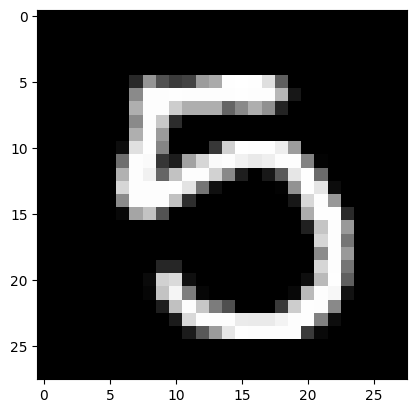

The Actual image is digit 5
The Predicted image is digit 0


In [108]:
infer(X_train,y_train,3,parameters)

In [107]:
total_params = sum(np.prod(param.shape) for param in parameters.values())
print(f"Total number of parameters: {total_params}")

Total number of parameters: 22154
